In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/matt/readout/host/')
import ali_offline_demod as dm
import ali_iv_analysis_2 as iv
import imp
import glob
import pickle
from scipy import spatial
import h5py
from scipy.fft import fft, ifft, fftfreq
from copy import deepcopy
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
import imp
import pandas as pd
from scipy.signal import savgol_filter as sg

/tmp/ipykernel_865280/3152699253.py:7: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
iv_file = 'toneinit_fcenter_4250.0_20240610172809_t_20240610173730'

result = iv.full_iv_process(iv_file,
                            f_sawtooth = 15,
                            Rsh=0.4,
                            iv_path = '/home/matt/ali_drive_mnt/IV_data',  #'/home/matt/alicpt_data/IV_data' -> path to data from before external hard drive was installed
                            filter_Rn_Al=False,
                            plot='None')

iv_path: /home/matt/ali_drive_mnt/IV_data
ts_directory: toneinit_fcenter_4250.0_20240610172809_t_20240610173730
tone init path: ali_drive_mnt/tone_initializations
looking for delay region


/home/matt/readout/host/ali_iv_analysis_2.py:584: RuntimeWarning: divide by zero encountered in log10
  y=np.append(y,20*np.log10(np.abs(test_sweep[1,:])))


start = 4024801757.8125
stop = 4034822265.625
3.220949243392887
n_phi0: 3.220949243392887


  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/230 [00:00<?, ?it/s]

In [3]:
#save the data to a file

output_file = '20240610_test_output_bl_11'

with open(f'{output_file}.pickle', 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

Text(0, 0.5, '$I_{TES}$ (mA)')

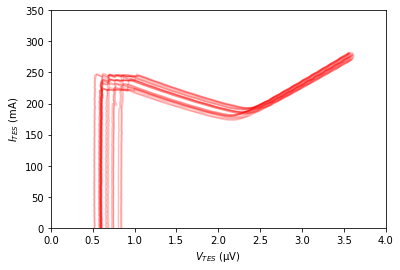

In [4]:
fig, ax = plt.subplots(1)

for i in range(len(result['Vtes'])):
    ax.plot(result['Vtes'][i],result['Ites'][i],'r',alpha=0.25)
    
ax.set_xlim([0,4])
ax.set_ylim([0,350])
ax.set_xlabel('$V_{TES}$ (μV)')
ax.set_ylabel('$I_{TES}$ (mA)')

In [5]:
print(result['Vtes'])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(0.0, 100.0)

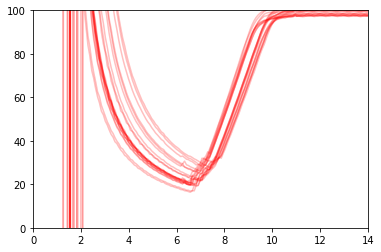

In [7]:
fig, ax = plt.subplots(1)

for i in range(len(result['Ites'])):
    ax.plot(result['Ibias'],result['Rtes'][i]/np.nanmedian(result['Rn Al'])*100,'r',alpha=0.25)
    
ax.set_xlim([0,14])
ax.set_ylim([0,100])
#ax.set_xlabel('$V_{TES}$ (μV)')
#ax.set_ylabel('$I_{TES}$ (mA)')